<a href="https://colab.research.google.com/github/dAn-solution/knocks100/blob/main/knock10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 091データの読み込みそして把握

In [1]:
# マウント実行
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
survey = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/colab/survey.csv")
print(len(survey))
survey.head()

86


,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている(AA駅),1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる（待機児童なし）,4
4,2019/1/6,駅前商店街が寂しい,2


In [3]:
survey.isna().sum()

datetime        0
comment         2
satisfaction    0
dtype: int64

In [4]:
survey = survey.dropna()
survey.isna().sum()

datetime        0
comment         0
satisfaction    0
dtype: int64

### 092不要な文字の除去

In [5]:
survey["comment"] = survey["comment"].str.replace("AA", "")
survey["comment"].head()

0     駅前に若者が集まっている(駅)
1    スポーツできる場所があるのが良い
2           子育て支援が嬉しい
3     保育園に入れる（待機児童なし）
4           駅前商店街が寂しい
Name: comment, dtype: object

In [6]:
survey["comment"] = survey["comment"].str.replace("\(.+?\)", "", regex=True)
survey.head()

,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている,1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる（待機児童なし）,4
4,2019/1/6,駅前商店街が寂しい,2


In [7]:
# 全角（）を除去
survey["comment"] = survey["comment"].str.replace("\（.+?\）", "", regex=True)
survey.head()

,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている,1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる,4
4,2019/1/6,駅前商店街が寂しい,2


### 093文字数をカウントしてヒストグラムを表示

In [8]:
survey["length"] = survey["comment"].str.len()
survey.head()

,datetime,comment,satisfaction,length
0,2019/3/11,駅前に若者が集まっている,1,12
1,2019/2/25,スポーツできる場所があるのが良い,5,16
2,2019/2/18,子育て支援が嬉しい,5,9
3,2019/4/9,保育園に入れる,4,7
4,2019/1/6,駅前商店街が寂しい,2,9


(array([11., 24., 21., 10.,  6.,  6.,  5.,  0.,  0.,  1.]),
 array([ 4. ,  8.6, 13.2, 17.8, 22.4, 27. , 31.6, 36.2, 40.8, 45.4, 50. ]),
 <a list of 10 Patch objects>)

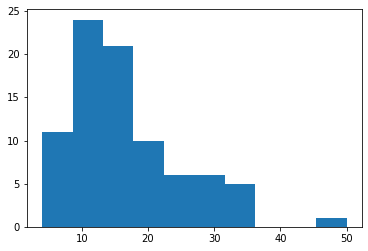

In [9]:
import matplotlib.pyplot as plt
plt.hist(survey["length"])

### 094形態素解析で文章を分析する

In [ ]:
# MeCab install準備
!apt install aptitude
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3==0.7

In [12]:
import MeCab
tagger = MeCab.Tagger()
text = "すもももももももものうち"
words = tagger.parse(text)
words

'すもも\t名詞,一般,*,*,*,*,すもも,スモモ,スモモ\nも\t助詞,係助詞,*,*,*,*,も,モ,モ\nもも\t名詞,一般,*,*,*,*,もも,モモ,モモ\nも\t助詞,係助詞,*,*,*,*,も,モ,モ\nもも\t名詞,一般,*,*,*,*,もも,モモ,モモ\nの\t助詞,連体化,*,*,*,*,の,ノ,ノ\nうち\t名詞,非自立,副詞可能,*,*,*,うち,ウチ,ウチ\nEOS\n'

In [13]:
words = tagger.parse(text).splitlines()
words_arr = []
for i in words:
    if i == 'EOS': continue
    word_tmp = i.split()[0]
    words_arr.append(word_tmp)
words_arr

['すもも', 'も', 'もも', 'も', 'もも', 'の', 'うち']

### 095形態素解析で文章から「動詞・名詞」を抽出する

In [36]:
text = "すもももももももものうち"
words = tagger.parse(text).splitlines()
words_arr = []
parts = ["名詞", "動詞"]
words = tagger.parse(text).splitlines()
words_arr = []
for i in words:
    if i == 'EOS' or i == '': continue
    word_tmp = i.split()[0]
    part = i.split()[1].split(",")[0]
    if not (part in parts):continue
    words_arr.append(word_tmp)
words_arr

['すもも', 'もも', 'もも', 'うち']

### 096形態素解析で抽出した頻出する名詞を確認する

In [40]:
all_words = []
parts = ["名詞"]
for n in range(len(survey)):
    text = survey["comment"].iloc[n]
    words = tagger.parse(text).splitlines()
    words_arr = []
    for i in words:
        if i == "EOS" or i == "":continue
        word_tmp = i.split()[0]
        part = i.split()[1].split(",")[0]
        if not (part in parts):continue
        words_arr.append(word_tmp)
    all_words.extend(words_arr)
print(all_words)

['駅前', '若者', 'スポーツ', '場所', 'の', '子育て', '支援', '保育園', '駅前', '商店', '街', '生活', '便利', '場所', '場所', '商業', '施設', '病院', '充実', 'サイクリング', 'コース', '祭り', '小学校', '綺麗', '公園', '近く', '公園', 'スーパー', 'の', '大変', '子育て', 'デートスポット', '商店', '街', '夜道', 'ゴミ', '処理', '楽', '映画', '館', '街路', '樹', '公園', '追加', '観光', 'スポット', '子育て', '道', '綺麗', '都内', 'アクセス', '家賃', 'リーズナブル', 'BBB', '渋滞', '商店', '街', '屋根', '雨', '大変', '商店', '街', 'たくさん', '喫茶店', 'スポーツ', 'ジム', '利用', 'スポーツ', 'ジム', '利用', '料金', 'ママ', '支援', 'バス', '自転車', 'ランニング', '運動', '場所', '有名', '企業', '駅前', '駐車', '場', '変', 'おじさん', '声', '事', '警察', '巡回', '強化', '消防', '団', '活発', '安心', '災害', '時', '避難', '場所', '気', '最近', '川', '氾濫', '被害', '町', 'よう', '氾濫', '防止', '説明', '信号', '交差点', 'ｘｘｘ', '事故', 'そう', '信号', '商店', '街', '活性', '化', '活動', '行政', '後押し', '子ども', '安全', '場所', '駅前', '駐輪場', '不便', '街路', '樹', '落ち葉', '掃除', '大変', '街路', '樹', '災害', '時', '備蓄', '状況', '歩道', '道', '安心', '地域', '自治体', '支援', '自治体', '活動', '頻繁', '安心', '観光', '地', '最近', '県', 'ナンバー', '車', '防犯', 'の', '駐車', '場', '数', '料金', '駅前', '公共', '駐車', '場

In [41]:
all_words_df = pd.DataFrame({"words":all_words, "count":len(all_words)*[1]})
all_words_df = all_words_df.groupby("words").sum()
all_words_df.sort_values("count",ascending=False).head()

,count
words,
駅前,7
場所,6
街,6
の,5
公園,5


### 097関係のない単語の除去（”の”の除去）

In [44]:
stop_words = ["の"]
all_words = []
parts = ["名詞"]
for n in range(len(survey)):
    text = survey["comment"].iloc[n]
    words = tagger.parse(text).splitlines()
    words_arr = []
    for i in words:
        if i == "EOS" or i == "": continue
        word_tmp = i.split()[0]
        part = i.split()[1].split(",")[0]
        if not (part in parts):continue
        if word_tmp in stop_words:continue
        words_arr.append(word_tmp)
    all_words.extend(words_arr)
print(all_words)

['駅前', '若者', 'スポーツ', '場所', '子育て', '支援', '保育園', '駅前', '商店', '街', '生活', '便利', '場所', '場所', '商業', '施設', '病院', '充実', 'サイクリング', 'コース', '祭り', '小学校', '綺麗', '公園', '近く', '公園', 'スーパー', '大変', '子育て', 'デートスポット', '商店', '街', '夜道', 'ゴミ', '処理', '楽', '映画', '館', '街路', '樹', '公園', '追加', '観光', 'スポット', '子育て', '道', '綺麗', '都内', 'アクセス', '家賃', 'リーズナブル', 'BBB', '渋滞', '商店', '街', '屋根', '雨', '大変', '商店', '街', 'たくさん', '喫茶店', 'スポーツ', 'ジム', '利用', 'スポーツ', 'ジム', '利用', '料金', 'ママ', '支援', 'バス', '自転車', 'ランニング', '運動', '場所', '有名', '企業', '駅前', '駐車', '場', '変', 'おじさん', '声', '事', '警察', '巡回', '強化', '消防', '団', '活発', '安心', '災害', '時', '避難', '場所', '気', '最近', '川', '氾濫', '被害', '町', 'よう', '氾濫', '防止', '説明', '信号', '交差点', 'ｘｘｘ', '事故', 'そう', '信号', '商店', '街', '活性', '化', '活動', '行政', '後押し', '子ども', '安全', '場所', '駅前', '駐輪場', '不便', '街路', '樹', '落ち葉', '掃除', '大変', '街路', '樹', '災害', '時', '備蓄', '状況', '歩道', '道', '安心', '地域', '自治体', '支援', '自治体', '活動', '頻繁', '安心', '観光', '地', '最近', '県', 'ナンバー', '車', '防犯', '駐車', '場', '数', '料金', '駅前', '公共', '駐車', '場', '歩行', '者', '

In [45]:
all_words_df = pd.DataFrame({"words":all_words, "count":len(all_words)*[1]})
all_words_df = all_words_df.groupby("words").sum()
all_words_df.sort_values("count",ascending=False).head()

,count
words,
駅前,7
場所,6
街,6
公園,5
商店,5


### 098顧客満足度と頻出単語の関係をみる

In [48]:
stop_words = ["の"]
parts = ["名詞"]
all_words = []
satisfaction = []
for n in range(len(survey)):
    text = survey["comment"].iloc[n]
    words = tagger.parse(text).splitlines()
    words_arr = []
    for i in words:
        if i == "EOS" or i == "": continue
        word_tmp = i.split()[0]
        part = i.split()[1].split(",")[0]
        if not (part in parts):continue
        if word_tmp in stop_words:continue
        words_arr.append(word_tmp)
        satisfaction.append(survey["satisfaction"].iloc[n])
    all_words.extend(words_arr)
all_words_df = pd.DataFrame({"words":all_words, "satisfaction":satisfaction, "count":len(all_words)*[1]})
all_words_df.head()

,words,satisfaction,count
0,駅前,1,1
1,若者,1,1
2,スポーツ,5,1
3,場所,5,1
4,子育て,5,1


In [51]:
words_satisfaction = all_words_df.groupby("words").mean()["satisfaction"]
words_count = all_words_df.groupby("words").sum()["count"]
words_df = pd.concat([words_satisfaction, words_count], axis=1)
words_df.head()

,satisfaction,count
words,,
BBB,2.0,1
^^,5.0,1
おじさん,1.0,1
ごみ,2.0,1
そう,1.0,1


In [53]:
words_df = words_df.loc[words_df["count"]>=3]
words_df.sort_values("satisfaction", ascending=False).head()

,satisfaction,count
words,,
子育て,4.333333,3
綺麗,4.333333,3
安心,4.333333,3
スポーツ,3.666667,3
道,3.000000,3


In [54]:
words_df.sort_values("satisfaction").head()

,satisfaction,count
words,,
駐車,1.000000,4
場,1.000000,4
信号,1.333333,3
大変,1.333333,3
駅前,1.428571,7


### 099アンケート毎の特徴を表現する

In [56]:
parts = ["名詞"]
all_words_df = pd.DataFrame()
satisfaction = []
for n in range(len(survey)):
    text = survey["comment"].iloc[n]
    words = tagger.parse(text).splitlines()
    words_df = pd.DataFrame()
    for i in words:
        if i == "EOS" or i == "":continue
        word_tmp = i.split()[0]
        part = i.split()[1].split(",")[0]
        if not (part in parts):continue
        words_df[word_tmp] = [1]
    all_words_df = pd.concat([all_words_df, words_df], ignore_index=True)
all_words_df.head()

,駅前,若者,スポーツ,場所,の,子育て,支援,保育園,商店,街,生活,便利,商業,施設,病院,充実,サイクリング,コース,祭り,小学校,綺麗,公園,近く,スーパー,大変,デートスポット,夜道,ゴミ,処理,楽,映画,館,街路,樹,追加,観光,スポット,道,都内,アクセス,...,無愛想,出張所,土日,経路,表示,市,ホームページ,奇麗,電話,対応,路地,街頭,動物,園,冬場,路面,凍結,自然,豊か,野良猫,糞,害,対策,相談,とき,親身,高速,道路,拡幅,まち,マスコット,夜間,不安,高齢,サポート,校庭,芝生,投稿,遊び,道具
0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
all_words_df = all_words_df.fillna(0)
all_words_df.head()

,駅前,若者,スポーツ,場所,の,子育て,支援,保育園,商店,街,生活,便利,商業,施設,病院,充実,サイクリング,コース,祭り,小学校,綺麗,公園,近く,スーパー,大変,デートスポット,夜道,ゴミ,処理,楽,映画,館,街路,樹,追加,観光,スポット,道,都内,アクセス,...,無愛想,出張所,土日,経路,表示,市,ホームページ,奇麗,電話,対応,路地,街頭,動物,園,冬場,路面,凍結,自然,豊か,野良猫,糞,害,対策,相談,とき,親身,高速,道路,拡幅,まち,マスコット,夜間,不安,高齢,サポート,校庭,芝生,投稿,遊び,道具
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 100類似アンケートを探す

In [58]:
print(survey["comment"].iloc[2])
target_text = all_words_df.iloc[2]
print(target_text)

子育て支援が嬉しい
駅前      0.0
若者      0.0
スポーツ    0.0
場所      0.0
の       0.0
       ... 
校庭      0.0
芝生      0.0
投稿      0.0
遊び      0.0
道具      0.0
Name: 2, Length: 184, dtype: float64


In [60]:
import numpy as np
cos_sim = []
for i in range(len(all_words_df)):
    cos_text = all_words_df.iloc[i]
    cos = np.dot(target_text, cos_text) / (np.linalg.norm(target_text) * np.linalg.norm(cos_text))
    cos_sim.append(cos)
all_words_df["cos_sim"] = cos_sim
all_words_df.sort_values("cos_sim", ascending=False).head()

,駅前,若者,スポーツ,場所,の,子育て,支援,保育園,商店,街,生活,便利,商業,施設,病院,充実,サイクリング,コース,祭り,小学校,綺麗,公園,近く,スーパー,大変,デートスポット,夜道,ゴミ,処理,楽,映画,館,街路,樹,追加,観光,スポット,道,都内,アクセス,...,出張所,土日,経路,表示,市,ホームページ,奇麗,電話,対応,路地,街頭,動物,園,冬場,路面,凍結,自然,豊か,野良猫,糞,害,対策,相談,とき,親身,高速,道路,拡幅,まち,マスコット,夜間,不安,高齢,サポート,校庭,芝生,投稿,遊び,道具,cos_sim
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
24,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107
15,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107
33,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
50,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.408248


In [62]:
print(survey["comment"].iloc[2])
print(survey["comment"].iloc[24])
print(survey["comment"].iloc[15])
print(survey["comment"].iloc[33])
print(survey["comment"].iloc[50])

子育て支援が嬉しい
子育てがしやすい
子育てしやすい
働くママの支援をもっと増やして欲しい
地域の自治体をもっと支援してほしい
